<a href="https://colab.research.google.com/github/fatwaman/Learning_Python/blob/main/NER_BiLSTM_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Word Embedding Moddel Fasttext**
---







In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz
!gunzip cc.id.300.vec.gz

--2025-05-05 01:28:39--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.165.160.106, 3.165.160.70, 3.165.160.69, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.165.160.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1227018698 (1.1G) [binary/octet-stream]
Saving to: ‘cc.id.300.vec.gz’

cc.id.300.vec.gz    100%[===================>]   1.14G   161MB/s    in 6.5s    

2025-05-05 01:28:45 (179 MB/s) - ‘cc.id.300.vec.gz’ saved [1227018698/1227018698]



In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
opencv-python-

In [ ]:
!pip install --upgrade numpy
!pip install --force-reinstall gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling num

**BiLSTM-CNNs**
---



**Import Library**
---



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Conv1D, TimeDistributed, Dense, Dropout, Masking, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
import gensim
import re


**Preprocessing**
---



In [ ]:
def normalize_text(text):
    text = text.lower()
    text = normalize_dates(text)
    text = re.sub(r"[^\w\s/]", "", text)
    return text.strip()

def normalize_dates(text):
    month_to_num = {
        'januari': '01', 'februari': '02', 'maret': '03', 'april': '04',
        'mei': '05', 'juni': '06', 'juli': '07', 'agustus': '08',
        'september': '09', 'oktober': '10', 'november': '11', 'desember': '12'
    }

    text = re.sub(r'\((\d{1,2}/\d{1,2}/\d{4})\)', r'\1', text)

    pattern_dd_month_yyyy = r'\b(\d{1,2})\s+(' + '|'.join(month_to_num.keys()) + r')\s+(\d{4})\b'
    text = re.sub(
        pattern_dd_month_yyyy,
        lambda m: f"{m.group(1)}/{month_to_num[m.group(2).lower()]}/{m.group(3)}",
        text,
        flags=re.IGNORECASE
    )

    text = re.sub(r'\b(\d{4})-(\d{2})-(\d{2})\b', r'\3/\2/\1', text)
    text = re.sub(r'\b(\d{1,2})/(\d{1,2})/(\d{2,4})\b', r'\1/\2/\3', text)
    text = re.sub(r'\b(\d{1,2})[-.](\d{1,2})[-.](\d{4})\b', r'\1/\2/\3', text)
    return text


def tokenize(text):
    return text_to_word_sequence(text, filters='!"#$%&()*+,-.:;<=>?@[\\]^_`{|}~\t\n')


sentences, labels = [], []
current_sentence, current_labels = [], []

with open('datasetperistiwa.tsv', 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()
        if not line:
            if current_sentence:
                sentences.append(current_sentence)
                labels.append(current_labels)
                current_sentence, current_labels = [], []
        else:
            try:
                word, label = line.split('\t')
                current_sentence.append(word)
                current_labels.append(label)
            except ValueError:
                continue

if current_sentence:
    sentences.append(current_sentence)
    labels.append(current_labels)

print(f"Jumlah kalimat: {len(sentences)}")

Jumlah kalimat: 967


In [ ]:
# Menyatukan token menjadi kalimat untuk preprocessing
cleaned_sentences = [" ".join(normalize_text(word) for word in sentence) for sentence in sentences]

# Tokenisasi kalimat yang sudah dibersihkan
tokenized_sentences = [tokenize(sentence) for sentence in cleaned_sentences]

print("\nContoh data yang sudah ditokenisasi:")
print(tokenized_sentences[:5])

print("\nContoh label asli:")
print(labels[:5])


Contoh data yang sudah ditokenisasi:
[['korban', 'kecelakaan', 'ditolong', 'oleh', 'personel', 'polres', 'simeulue', 'di', 'desa', 'suak', 'buluh'], ['personel', 'polres', 'aceh', 'membantu', 'korban', 'insiden', 'di', 'desa', 'air', 'dingin'], ['personel', 'polres', 'simeulue', 'dengan', 'cepat', 'bergerak', 'untuk', 'menolong', 'korban', 'insiden', 'lalu', 'lintas', 'yang', 'terjadi', 'di', 'desa', 'suak', 'buluh', 'kecamatan', 'simeulue', 'timur', 'kabupaten', 'simeulue', 'pada', 'hari', 'kamis', '31/06/2024'], ['korban', 'insiden', 'lalu', 'lintas', 'di', 'desa', 'suak', 'buluh', 'kecamatan', 'simeulue', 'timur', 'kabupaten', 'simeulue', 'pada', 'hari', 'kamis', '31/07/2024', 'segera', 'mendapatkan', 'pertolongan', 'dari', 'personel', 'polres', 'simeulue', 'yang', 'langsung', 'bergerak', 'ke', 'lokasi', 'kejadian'], ['insiden', 'tersebut', 'melibatkan', 'dua', 'pengendara', 'sepeda', 'motor', 'yang', 'saling', 'bertabrakan']]

Contoh label asli:
[['EVENT', 'EVENT', 'O', 'O', 'O', 

**Distribusi Label**
---



/tmp/ipython-input-3-2397323169.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_label_counts, x='Label', y='Jumlah', palette='viridis')


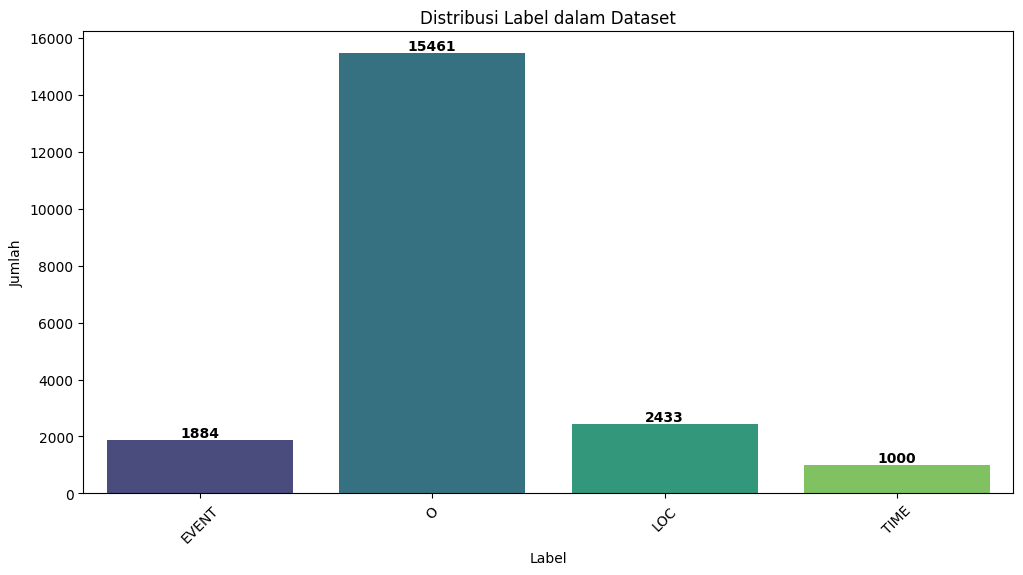

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

all_labels = [label for sublist in labels for label in sublist]

label_counts = Counter(all_labels)

df_label_counts = pd.DataFrame(label_counts.items(), columns=['Label', 'Jumlah'])

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_label_counts, x='Label', y='Jumlah', palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.title('Distribusi Label dalam Dataset')
plt.xticks(rotation=45)
plt.show()

**Mapping Kata Ke Index**
---



In [ ]:
# Mapping kata dan label ke angka
word_vocab = {"<PAD>": 0, "<UNK>": 1}
label_vocab = {"O": 0}

for sentence in sentences:
    for word in sentence:
        if word not in word_vocab:
            word_vocab[word] = len(word_vocab)

for label_seq in labels:
    for label in label_seq:
        if label not in label_vocab:
            label_vocab[label] = len(label_vocab)

sentences_idx = [[word_vocab.get(word, word_vocab["<UNK>"]) for word in sentence] for sentence in sentences]
labels_idx = [[label_vocab[label] for label in label_seq] for label_seq in labels]


**Padding**
---



In [ ]:
# Padding sequences
max_seq_len = 512
padded_sentences = pad_sequences(sentences_idx, maxlen=max_seq_len, padding="post", value=0)
padded_labels = pad_sequences(labels_idx, maxlen=max_seq_len, padding="post", value=0)

**Encoding**
---



In [ ]:
# One-hot encoding untuk labels
num_classes = len(label_vocab)
categorical_labels = to_categorical(padded_labels, num_classes=num_classes)

**Word Embedding**
---



In [ ]:
# Membaca FastText pretrained embedding
fasttext_model = gensim.models.KeyedVectors.load_word2vec_format('cc.id.300.vec', binary=False)
embedding_dim = fasttext_model.vector_size

# Membuat embedding matrix dari FastText
embedding_matrix = np.random.uniform(-0.01, 0.01, (len(word_vocab), embedding_dim))
for word, i in word_vocab.items():
    if word in fasttext_model.key_to_index:
        embedding_matrix[i] = fasttext_model[word]

In [ ]:
# Ambil 5 kalimat pertama
top_5_sentences = padded_sentences[:30]

# Konversi indeks kata menjadi embedding
for i, sentence in enumerate(top_5_sentences):
    print(f"Kalimat {i+1}:")
    for word_idx in sentence:
        if word_idx == 0:
            continue
        word = [key for key, val in word_vocab.items() if val == word_idx][0]
        embedding_vector = embedding_matrix[word_idx]
        print(f"{word}: {embedding_vector[:5]}...")
    print("\n")

Kalimat 1:
Korban: [-0.0075  0.1138 -0.0082  0.1104 -0.035 ]...
Kecelakaan: [-0.0376  0.0118  0.0412  0.0741  0.0095]...
ditolong: [-0.0267  0.0017  0.0775  0.0604 -0.0307]...
oleh: [ 0.0504 -0.0135  0.0006  0.0225 -0.0987]...
Personel: [-0.0277  0.0378  0.0626  0.0674  0.0218]...
Polres: [ 0.0095  0.0285  0.0202  0.2439 -0.0514]...
Simeulue: [-0.1274  0.0131 -0.0185  0.0621 -0.0121]...
di: [-0.0048 -0.0036 -0.0809  0.4014  0.0801]...
Desa: [-0.0568  0.0214  0.0463  0.1178 -0.0514]...
Suak: [-0.2094 -0.0113 -0.063   0.0599  0.051 ]...
Buluh: [-0.0597  0.0068 -0.0249  0.1983 -0.1187]...


Kalimat 2:
Personel: [-0.0277  0.0378  0.0626  0.0674  0.0218]...
Polres: [ 0.0095  0.0285  0.0202  0.2439 -0.0514]...
Aceh: [-0.0815 -0.0543  0.0469  0.2119  0.0343]...
Membantu: [-0.04    0.0389  0.0186  0.0337 -0.0584]...
Korban: [-0.0075  0.1138 -0.0082  0.1104 -0.035 ]...
Insiden: [ 0.0212  0.0376 -0.0247  0.0697  0.0347]...
di: [-0.0048 -0.0036 -0.0809  0.4014  0.0801]...
Desa: [-0.0568  0.0214  

**Membangun Model**
---



In [ ]:
from keras.callbacks import EarlyStopping
model = Sequential()
model.add(Embedding(
    input_dim=len(word_vocab),
    output_dim=embedding_dim,
    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
    input_length=max_seq_len,
    trainable=False,
    mask_zero=True
))
model.add(Masking(mask_value=0.0))
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)))
model.add(Conv1D(filters=128, kernel_size=3, activation="relu", padding="same"))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=1))
model.add(TimeDistributed(Dense(64, activation="relu")))
model.add(Dropout(0.5))
model.add(TimeDistributed(Dense(num_classes, activation="softmax")))
dummy_input = np.zeros((1, max_seq_len))
model(dummy_input)
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (1, 512, 300)          │     1,137,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ masking (Masking)               │ (1, 512, 300)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (1, 512, 256)          │       439,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (1, 512, 128)          │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (1, 512, 128)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (1, 512, 128)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (1, 512, 64)           │         8,256 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (1, 512, 64)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (1, 512, 4)            │           260 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,683,844 (6.42 MB)

 Trainable params: 546,244 (2.08 MB)

 Non-trainable params: 1,137,600 (4.34 MB)

None


**Kompile Dengan Optimasi**
---



In [ ]:
# Compile Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Hitung class weights
flattened_labels = [label for seq in labels for label in seq]
class_weights = compute_class_weight('balanced', classes=np.unique(flattened_labels), y=flattened_labels)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

**Membagi Data**
---



In [ ]:
# Split data menjadi train dan test
train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    padded_sentences, categorical_labels, test_size=0.2, random_state=42
)

In [ ]:
# Buat sample weights
sample_weights = np.zeros((train_labels.shape[0], train_labels.shape[1]))
for i, seq in enumerate(train_labels):
    for j in range(len(seq)):
        label_index = np.argmax(seq[j])
        sample_weights[i, j] = class_weights_dict.get(label_index, 1.0)

# Tambahkan EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

**Latih Model**
---



In [ ]:
# Training model
history = model.fit(
    train_sentences,
    train_labels,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    sample_weight=sample_weights,
    callbacks=[early_stop]
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 174s 5s/step - accuracy: 0.9060 - loss: 2.3005 - val_accuracy: 0.9896 - val_loss: 0.2323
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - accuracy: 0.9852 - loss: 0.2365 - val_accuracy: 0.9896 - val_loss: 0.0750
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.9884 - loss: 0.0921 - val_accuracy: 0.9896 - val_loss: 0.0676
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.9886 - loss: 0.0838 - val_accuracy: 0.9896 - val_loss: 0.0634
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.9887 - loss: 0.0776 - val_accuracy: 0.9896 - val_loss: 0.0593
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step - accuracy: 0.9891 - loss: 0.0698 - val_accuracy: 0.9896 - val_loss: 0.0553
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.9886 - loss: 0.0687 - val_accuracy: 0.9900 - val_loss: 0.0506
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.9892 - loss: 0.0592 - val_accuracy: 0.9900 - val_loss: 0.

**Evaluasi**
---



In [ ]:
# Evaluasi model
predicted_probs = model.predict(test_sentences)
predicted_labels = np.argmax(predicted_probs, axis=-1)
test_labels_idx = np.argmax(test_labels, axis=-1)

# Mapping indeks ke label
index_to_label = {index: label for label, index in label_vocab.items()}
unique_test_labels = sorted(set(test_labels_idx.flatten()))
filtered_target_names = [str(index_to_label[label]) for label in unique_test_labels]

print("Evaluasi Model:")
print(
    classification_report(
        test_labels_idx.flatten(),
        predicted_labels.flatten(),
        labels=unique_test_labels,
        target_names=filtered_target_names
    )
)



7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step
Evaluasi Model:
              precision    recall  f1-score   support

           O       1.00      1.00      1.00     97691
       EVENT       0.73      0.56      0.63       354
         LOC       0.96      0.59      0.73       562
        TIME       0.84      0.89      0.86       209

    accuracy                           0.99     98816
   macro avg       0.88      0.76      0.81     98816
weighted avg       0.99      0.99      0.99     98816



7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 815ms/step


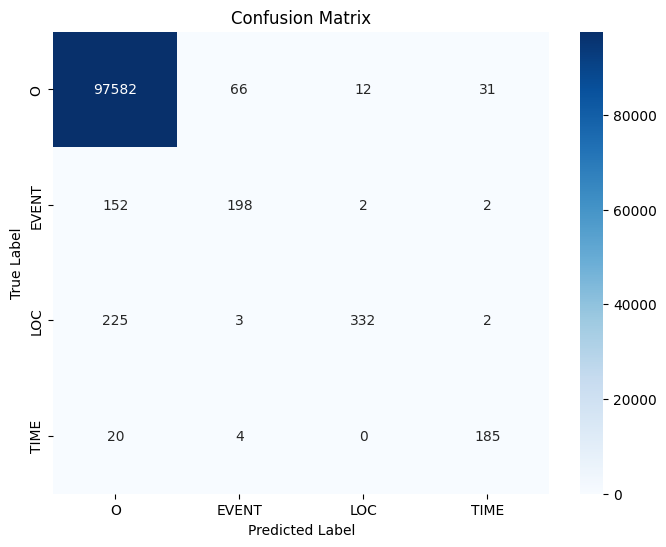

Classification Report:
              precision    recall  f1-score   support

           O       1.00      1.00      1.00     97691
       EVENT       0.73      0.56      0.63       354
         LOC       0.96      0.59      0.73       562
        TIME       0.84      0.89      0.86       209

    accuracy                           0.99     98816
   macro avg       0.88      0.76      0.81     98816
weighted avg       0.99      0.99      0.99     98816



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Prediksi data uji
y_pred = model.predict(test_sentences) # X_test diganti dengan test_sentences
y_pred_classes = np.argmax(y_pred, axis=-1)  # Ambil indeks dengan probabilitas tertinggi
y_true_classes = np.argmax(test_labels, axis=-1)  # Konversi label one-hot ke indeks # y_test diganti dengan test_labels

# Buat Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes.flatten(), y_pred_classes.flatten())

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
# label_encoder.classes_ diganti dengan filtered_target_names
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=filtered_target_names, yticklabels=filtered_target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("Classification Report:")
# label_encoder.classes_ diganti dengan filtered_target_names
print(classification_report(y_true_classes.flatten(), y_pred_classes.flatten(), target_names=filtered_target_names))

In [ ]:
print("Contoh test_labels_idx:", test_labels_idx[:10])
print("Contoh predicted_labels:", predicted_labels[:10])
print("Unique labels in test set:", np.unique(test_labels_idx))
print("Unique labels in predicted set:", np.unique(predicted_labels))


Contoh test_labels_idx: [[3 3 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [2 2 2 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Contoh predicted_labels: [[3 3 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Unique labels in test set: [0 1 2 3]
Unique labels in predicted set: [0 1 2 3]


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML


# Ambil 10 data uji pertama
X_sample = test_sentences[:10] # Change X_test to test_sentences
y_true_sample = test_labels[:10] # Change y_test to test_labels
y_pred_sample = model.predict(X_sample)

# Buat dataframe per token
data = []
for i in range(len(X_sample)):
    tokens = X_sample[i]
    true_labels = y_true_sample[i]
    pred_labels = y_pred_sample[i]

    for tok, t_label, p_label in zip(tokens, true_labels, pred_labels):
        # Get the index of the true label (highest probability)
        true_label_idx = np.argmax(t_label)

        # Get the index of the predicted label (highest probability)
        pred_label_idx = np.argmax(p_label)

        data.append({
            "Token": tok,
            "True Label": t_label,
            "Predicted Label": p_label,
            # Compare the indices for equality
            "Status": "✅" if true_label_idx == pred_label_idx else "❌"
        })

df = pd.DataFrame(data)

# Visualisasi: warnai baris sesuai status
def highlight_mismatch(row):
    if row['Status'] == '❌':
        return ['background-color: #fdd'] * 4
    else:
        return ['background-color: #dfd'] * 4

styled = df.style.apply(highlight_mismatch, axis=1)
display(HTML(styled.to_html()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step


In [ ]:
# Cetak hasil prediksi vs label asli
for i in range(20):
    print("Kalimat", i+1)
    for j in range(len(test_sentences[i])):
        true_label = index_to_label[test_labels_idx[i][j]]
        pred_label = index_to_label[predicted_labels[i][j]]
        print(f"TOKEN-{j+1}: {true_label} | Prediksi: {pred_label}")
    print("-" * 30)


Kalimat 1
TOKEN-1: TIME | Prediksi: TIME
TOKEN-2: TIME | Prediksi: TIME
TOKEN-3: O | Prediksi: O
TOKEN-4: O | Prediksi: O
TOKEN-5: LOC | Prediksi: LOC
TOKEN-6: O | Prediksi: O
TOKEN-7: EVENT | Prediksi: O
TOKEN-8: EVENT | Prediksi: O
TOKEN-9: O | Prediksi: O
TOKEN-10: O | Prediksi: O
TOKEN-11: O | Prediksi: O
TOKEN-12: O | Prediksi: O
TOKEN-13: O | Prediksi: O
TOKEN-14: O | Prediksi: O
TOKEN-15: O | Prediksi: O
TOKEN-16: O | Prediksi: O
TOKEN-17: O | Prediksi: O
TOKEN-18: O | Prediksi: O
TOKEN-19: O | Prediksi: O
TOKEN-20: O | Prediksi: O
TOKEN-21: O | Prediksi: O
TOKEN-22: O | Prediksi: O
TOKEN-23: O | Prediksi: O
TOKEN-24: O | Prediksi: O
TOKEN-25: O | Prediksi: O
TOKEN-26: O | Prediksi: O
TOKEN-27: O | Prediksi: O
TOKEN-28: O | Prediksi: O
TOKEN-29: O | Prediksi: O
TOKEN-30: O | Prediksi: O
TOKEN-31: O | Prediksi: O
TOKEN-32: O | Prediksi: O
TOKEN-33: O | Prediksi: O
TOKEN-34: O | Prediksi: O
TOKEN-35: O | Prediksi: O
TOKEN-36: O | Prediksi: O
TOKEN-37: O | Prediksi: O
TOKEN-38: O |

**Uji Coba Model**
---



In [ ]:
def predict_entities(model, word_vocab, label_vocab, sentence, max_seq_len=512):
    """
    Memprediksi entitas dari kalimat baru.

    Args:
        model: Model NER yang sudah dilatih.
        word_vocab: Vocabulary untuk kata.
        label_vocab: Vocabulary untuk label.
        sentence: Kalimat baru yang akan diprediksi.
        max_seq_len: Panjang maksimum sequence.

    Returns:
        List of tuples (token, label).
    """
    # Normalisasi teks
    normalized_sentence = normalize_text(sentence)

    # Tokenisasi kalimat
    tokens = tokenize(normalized_sentence)

    # Konversi token ke indeks
    tokens_idx = [word_vocab.get(word, word_vocab["<UNK>"]) for word in tokens]

    # Padding sequence
    padded_tokens = pad_sequences([tokens_idx], maxlen=max_seq_len, padding="post", value=0)

    # Prediksi dengan model
    predictions = model.predict(padded_tokens)
    predicted_labels = np.argmax(predictions, axis=-1)[0]

    # Mapping indeks ke label
    index_to_label = {index: label for label, index in label_vocab.items()}
    predicted_labels = [index_to_label[idx] for idx in predicted_labels[:len(tokens)]]

    return list(zip(tokens, predicted_labels))

# Contoh penggunaan
test_cases = [
    "Kabupaten Simeulue Aceh kembali dilanda musibah kebakaran, peristiwa tersebut terjadi tepat pada pukul 21:00 Sabtu 21 Desember 2022",
    "Rapat direksi akan diadakan di Kabupaten Kepulauan Simeulue pada 15 Oktober 2023 pukul 14:30",
    "Gempa berkekuatan 5.6 SR mengguncang Simeulue tanggal 10-09-2023",
    "Banjir, 01 September 2023, 10:40 WIB -  5 Desa dari 3 Kecamatan yang ada di Wilayah Kabupaten Simeulue terendam banjir,  banjir diakibatkan oleh intensitas curah hujan yang tinggi sehingga meluapnya air ke bahu jalan. Selain itu, kejadian ini juga menyebabkan pohon tumbang"
]

for sentence in test_cases:
    predicted_entities = predict_entities(model, word_vocab, label_vocab, sentence)
    print("\nKalimat:", sentence)
    print("Prediksi Entitas:")
    for token, label in predicted_entities:
        print(f"{token}: {label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step

Kalimat: Kabupaten Simeulue Aceh kembali dilanda musibah kebakaran, peristiwa tersebut terjadi tepat pada pukul 21:00 Sabtu 21 Desember 2022
Prediksi Entitas:
kabupaten: O
simeulue: LOC
aceh: LOC
kembali: O
dilanda: O
musibah: EVENT
kebakaran: EVENT
peristiwa: EVENT
tersebut: O
terjadi: O
tepat: O
pada: O
pukul: TIME
2100: TIME
sabtu: O
21/12/2022: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step

Kalimat: Rapat direksi akan diadakan di Kabupaten Kepulauan Simeulue pada 15 Oktober 2023 pukul 14:30
Prediksi Entitas:
rapat: O
direksi: O
akan: O
diadakan: O
di: O
kabupaten: O
kepulauan: LOC
simeulue: LOC
pada: O
15/10/2023: TIME
pukul: TIME
1430: TIME
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   

Kalimat: Gempa berkekuatan 5.6 SR mengguncang Simeulue tanggal 10-09-2023
Prediksi Entitas:
gempa: EVENT
berkekuatan: O
56: O
sr: O
mengguncang: O
simeulue: O
tanggal: O
10/09/2023: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step

Kalimat: Banjir, 01 September 2023, 10:40 WIB -

**Simpan Model**
---



In [ ]:
import keras.saving
keras.saving.save_model(model, "bilstm_cnn_ner.keras")

In [ ]:
import pickle

# Simpan word_vocab dan label_vocab
with open("word_vocab.pkl", "wb") as f:
    pickle.dump(word_vocab, f)

with open("label_vocab.pkl", "wb") as f:
    pickle.dump(label_vocab, f)


In [ ]:
np.save("embedding_matrix.npy", embedding_matrix)
